In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

In [2]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [3]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [4]:
x = [1,2,3,4]
y = [1,2,3,4]

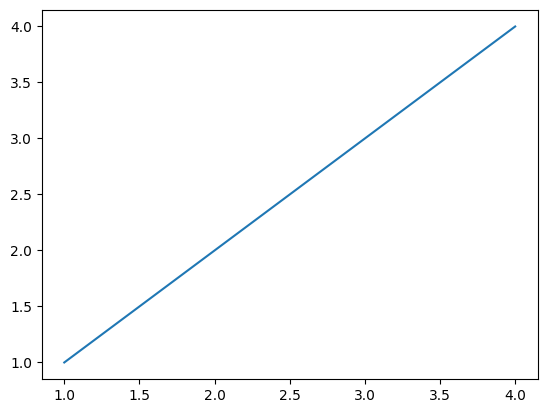

In [7]:
plt.plot(x,y)

In [8]:
df.job_posted_date.head()

,job_posted_date
0,2023-06-16 13:44:15
1,2023-01-14 13:18:07
2,2023-10-10 13:14:55
3,2023-07-04 13:01:41
4,2023-08-07 14:29:36


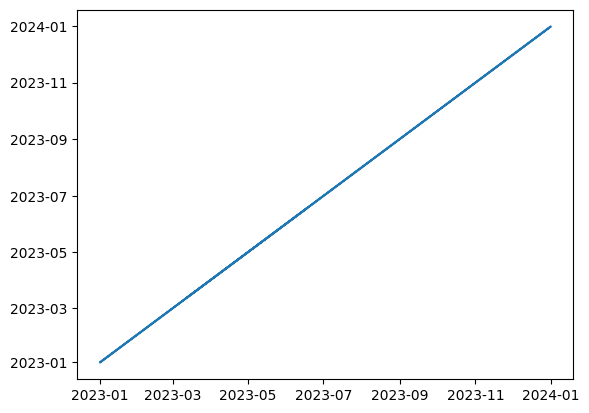

In [9]:
plt.plot(df.job_posted_date, df.job_posted_date)

In [13]:
date_counts = df.job_posted_date.value_counts()

date_counts = date_counts.sort_index()

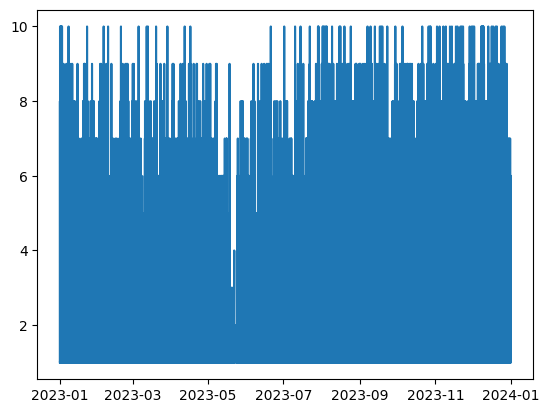

In [14]:
plt.plot(date_counts.index, date_counts)

In [16]:
df['job_posted_month'] = df['job_posted_date'].dt.month

In [18]:
monthly_counts = df.job_posted_month.value_counts()
monthly_counts = monthly_counts.sort_index()

monthly_counts

,count
job_posted_month,
1,91822
2,64578
3,64084
4,62919
5,52104
6,61572
7,63777
8,75162
9,62359


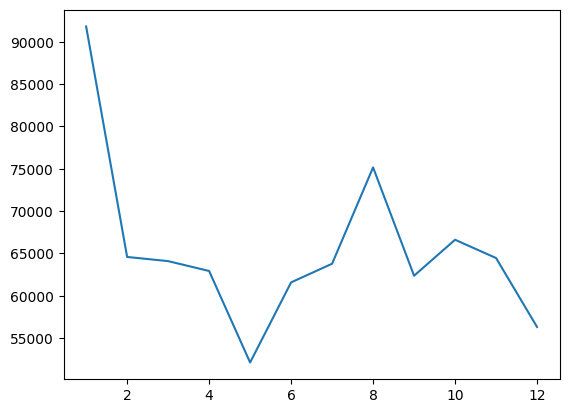

In [20]:
plt.plot(monthly_counts.index, monthly_counts.values)

In [21]:
job_counts = df.job_title_short.value_counts()

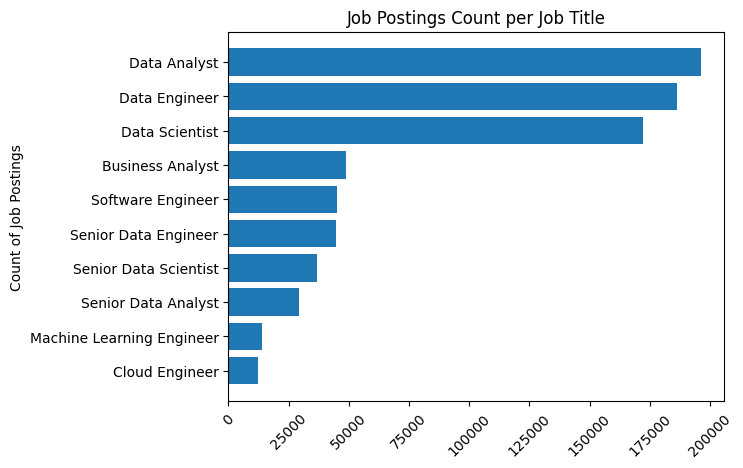

In [32]:
job_counts = job_counts.sort_values(ascending=True)
plt.barh(job_counts.index, job_counts)
plt.title('Job Postings Count per Job Title')
plt.ylabel('Count of Job Postings')
plt.xticks(rotation=45)
plt.show()

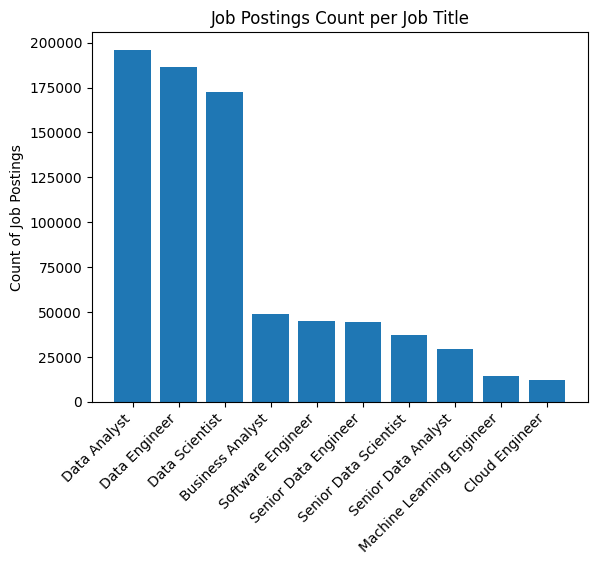

In [36]:
job_counts = job_counts.sort_values(ascending=False)
plt.bar(job_counts.index, job_counts)
plt.title('Job Postings Count per Job Title')
plt.ylabel('Count of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.show()

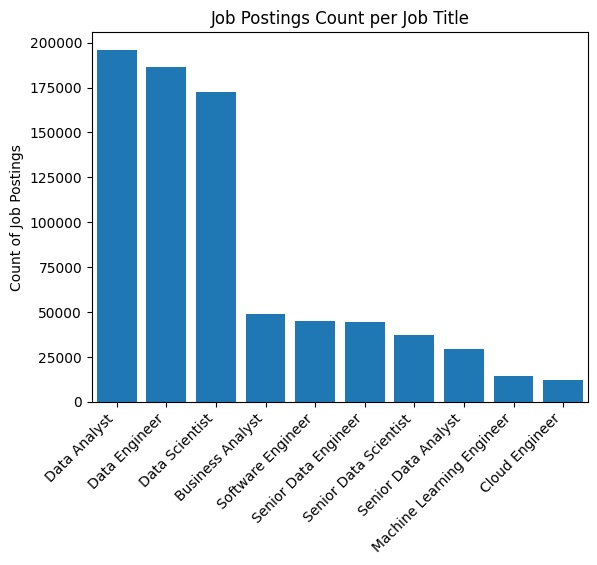

In [40]:
job_counts.plot(kind='bar')
plt.bar(job_counts.index, job_counts)
plt.title('Job Postings Count per Job Title')
plt.xlabel('')
plt.ylabel('Count of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: xlabel='job_posted_date'>

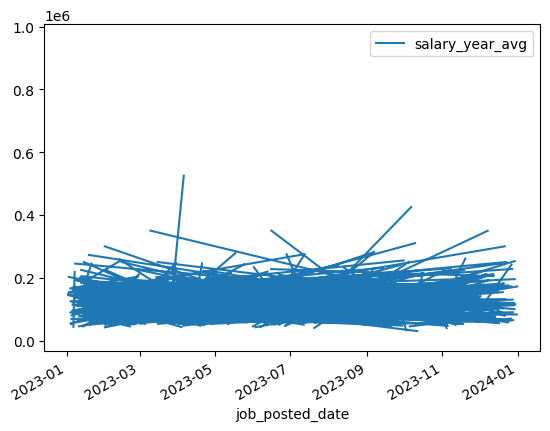

In [45]:
df[['job_posted_date', 'salary_year_avg']].dropna(subset=['salary_year_avg'])
df.plot(x='job_posted_date', y='salary_year_avg', kind='line')

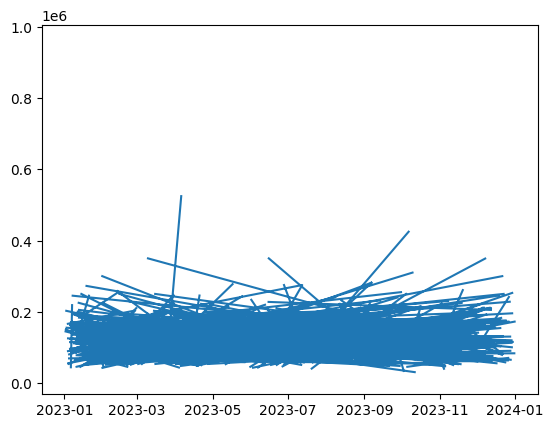

In [47]:
plt.plot(df.job_posted_date, df.salary_year_avg)

In [51]:
job_salary = df.groupby('job_title_short')['salary_year_avg'].median().sort_values()

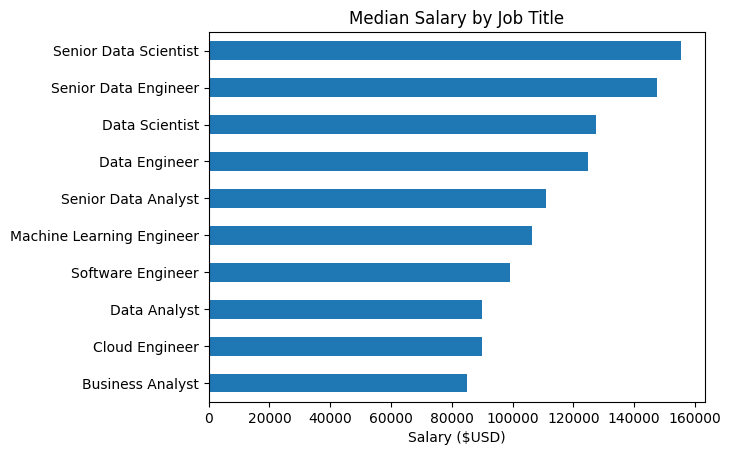

In [52]:
job_salary.plot(kind='barh')
plt.xlabel('Salary ($USD)')
plt.ylabel('')
plt.title('Median Salary by Job Title')
plt.show()